<Axes: >

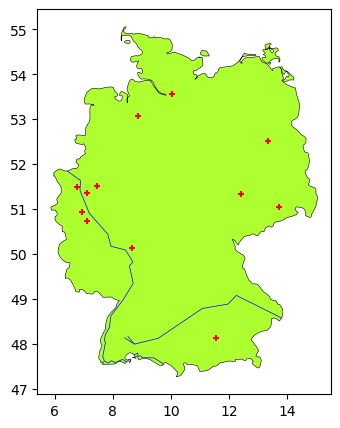

In [21]:
# EJERCICIO N°1
# 1. Follow the same steps in this last section to plot three maps of one country. Do not use Brazil.
# 2. Plot your three layers. (usa la misma base de datos

# Creamos nuestro link de la data mundial
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

# Abrimos las capas
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

# Trabajamos con Alemania
germany=countries[countries.COUNTRY=='Germany']

# Recortamos con gpd.clip y obtenemos un nuevo GDF
citiesGermany_clipped = gpd.clip(gdf=cities,
                          mask=germany)
riversGermany_clipped = gpd.clip(gdf=rivers,
                               mask=germany)

# Ploteamos y vemos nuestro mapa
base1 = germany.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesGermany_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base1)
riversGermany_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base1)

In [22]:
# EJERCICIO N°2
# 1. Reproject your country's map layers.
# 2. Plot the reprojected layers
# 3. Save the reprojected

# Escogemos Alemania
germany.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Unidades de medida
germany.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [6]:
# Comprobamos si se proyecta
germany.crs.is_projected

False

In [7]:
# Comprobamos si se proyecta
germany.crs.is_projected

False

In [8]:
# Con un poligono no proyectado obtenemos
germany.centroid

C:\Users\frede\AppData\Local\Temp\ipykernel_39768\3826757446.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  germany.centroid


87    POINT (10.39365 51.10656)
dtype: geometry

In [9]:
# Reproyectamos
# Utilizamos un CRS más comúnmente utilizado para datos en Alemania, como EPSG:25832 (ETRS89 / UTM zone 32N).
germany.to_crs(25832).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [10]:
# Esto ahora funciona
germany.to_crs(25832).centroid

87    POINT (596343.988 5656461.701)
dtype: geometry

<Axes: >

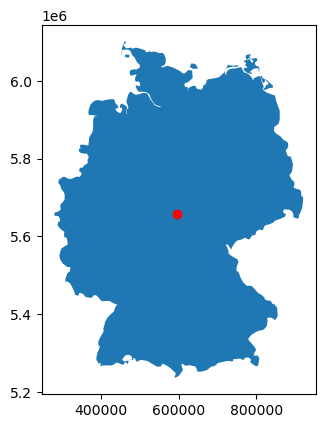

In [11]:
# Volvemos a plotear
base25832=germany.to_crs(25832).plot()
germany.to_crs(25832).centroid.plot(color='red',ax=base25832)

In [12]:
# Instalaos fiona
!pip install fiona

In [13]:
# Mantengamos la versión proyectada para todos nuestros mapas:
germany_25832=germany.to_crs(25832)
cities_germany_25832=citiesGermany_clipped.to_crs(germany_25832.crs)
rivers_germany_25832=riversGermany_clipped.to_crs(germany_25832.crs)

# Guardamos un unico geopacke

import os

# Comprueba si el directorio "maps" existe
if not os.path.exists("maps"):
    os.makedirs("maps")  # Crea el directorio si no existe

germany_25832.to_file(os.path.join("maps","germanyMaps_25832.gpkg"), layer='country', driver="GPKG")
cities_germany_25832.to_file(os.path.join("maps","germanyMaps_25832.gpkg"), layer='cities', driver="GPKG")
rivers_germany_25832.to_file(os.path.join("maps","germanyMaps_25832.gpkg"), layer='rivers', driver="GPKG")
germany_25832.centroid.to_file(os.path.join("maps","germanyMaps_25832.gpkg"), layer='centroid', driver="GPKG")

In [14]:
# EJERCICIO N°3
# 1. Find the airports for your country here. The data is in a CSV file.
# 2. Create projected layer of airports.
# 3. Plot all the layers and airports on top.

import pandas as pd
infoairportsGermany=pd.read_csv("https://github.com/TartariaData/GeoDF_Operations/raw/main/data/de-airports.csv/")
infoairportsGermany.iloc[[0,1,2,3,-4,-3,-2,-1],:]
infoairportsGermany.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,2212,EDDF,large_airport,Frankfurt Airport,50.030241,8.561096,364.0,EU,Germany,DE,...,Frankfurt am Main,1,EDDF,FRA,NaN,https://www.frankfurt-airport.de/,https://en.wikipedia.org/wiki/Frankfurt_Airport,"EDAF, Frankfurt am Main, Frankfurt Main, Rhein...",1144675,2024-04-02T16:06:40+00:00
1,2218,EDDM,large_airport,Munich Airport,48.353802,11.786100,1487.0,EU,Germany,DE,...,Munich,1,EDDM,MUC,NaN,http://www.munich-airport.com/,https://en.wikipedia.org/wiki/Munich_Airport,"Franz Josef Strauss Airport, Flughafen München...",1026675,2022-03-29T22:05:19+00:00
2,2223,EDDT,closed,Berlin-Tegel Otto Lilienthal Airport,52.559700,13.287700,122.0,EU,Germany,DE,...,Berlin,0,NaN,NaN,NaN,http://www.berlin-airport.de/en/travellers-txl...,https://en.wikipedia.org/wiki/Berlin_Tegel_Air...,"TXL, EDDT, Otto Lilienthal",1012675,2024-02-05T16:28:30+00:00
3,2217,EDDL,large_airport,Düsseldorf Airport,51.289501,6.766780,147.0,EU,Germany,DE,...,Düsseldorf,1,EDDL,DUS,NaN,http://www.dus.com/dus_en/,https://en.wikipedia.org/wiki/D%C3%BCsseldorf_...,NaN,1017675,2023-12-04T14:06:43+00:00
4,2214,EDDH,large_airport,Hamburg Helmut Schmidt Airport,53.630402,9.988230,53.0,EU,Germany,DE,...,Hamburg,1,EDDH,HAM,NaN,https://www.hamburg-airport.de/en/,https://en.wikipedia.org/wiki/Hamburg_Airport,Hamburg-Fuhlsbüttel Airport,1012575,2021-03-12T16:04:07+00:00


In [15]:
# Nuestra primera fila llevara
infoairportsGermany.drop(index=0,inplace=True)
infoairportsGermany.reset_index(drop=True, inplace=True)

# Nos quedamos con columnas necesarias
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairportsGermany=infoairportsGermany.loc[:,keep]
infoairportsGermany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1322 non-null   object 
 1   type           1322 non-null   object 
 2   latitude_deg   1322 non-null   float64
 3   longitude_deg  1322 non-null   float64
 4   elevation_ft   1146 non-null   float64
 5   region_name    1322 non-null   object 
 6   municipality   1266 non-null   object 
dtypes: float64(3), object(4)
memory usage: 72.4+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

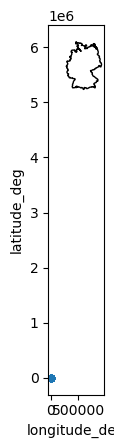

In [16]:
# Podemos observar que las columnas que usaremos ya son de tipo float64
# Entonces ploteamos
base = germany_25832.plot(color='white', edgecolor='black') #unprojected
infoairportsGermany.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [17]:
!pip install geopandas
!pip install matplotlib

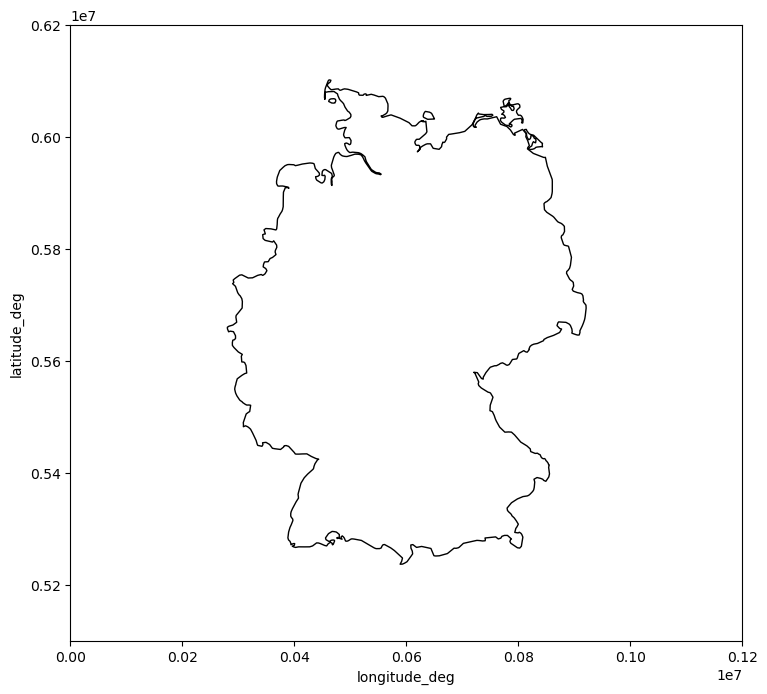

In [18]:
# Es asi como para una mejor visualización.
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Crear el gráfico base y guardarlo en 'base1' con un tamaño ajustado
fig, base1 = plt.subplots(figsize=(10, 8))
germany_25832.plot(ax=base1, color='white', edgecolor='black')

# Modificar las etiquetas del eje X para que se expresen en 1e7
base1.ticklabel_format(axis='x', style='sci', scilimits=(7,7))

# Ajustar el límite del eje X
base1.set_xlim([0, 0.12 * 10**7])  # Asegurar que el eje X llegue hasta 0.12e7

# Modificar las etiquetas del eje Y para que se expresen en 1e7
base1.ticklabel_format(axis='y', style='sci', scilimits=(7, 7))

# Ajustar el límite del eje Y
base1.set_ylim([5.1 * 10**6, 6.2 * 10**6])

# Superponer el scatter plot sobre el gráfico base
infoairportsGermany.plot.scatter(x='longitude_deg', y='latitude_deg', ax=base1, color='red')

# Mostrar el gráfico
plt.show()

In [19]:
airportsGermany=gpd.GeoDataFrame(data=infoairportsGermany.copy(),
                 geometry=gpd.points_from_xy(infoairportsGermany.longitude_deg,
                                             infoairportsGermany.latitude_deg),
                 crs=germany.crs.to_epsg())

airports_25832 = airportsGermany.to_crs(25832)

<Axes: >

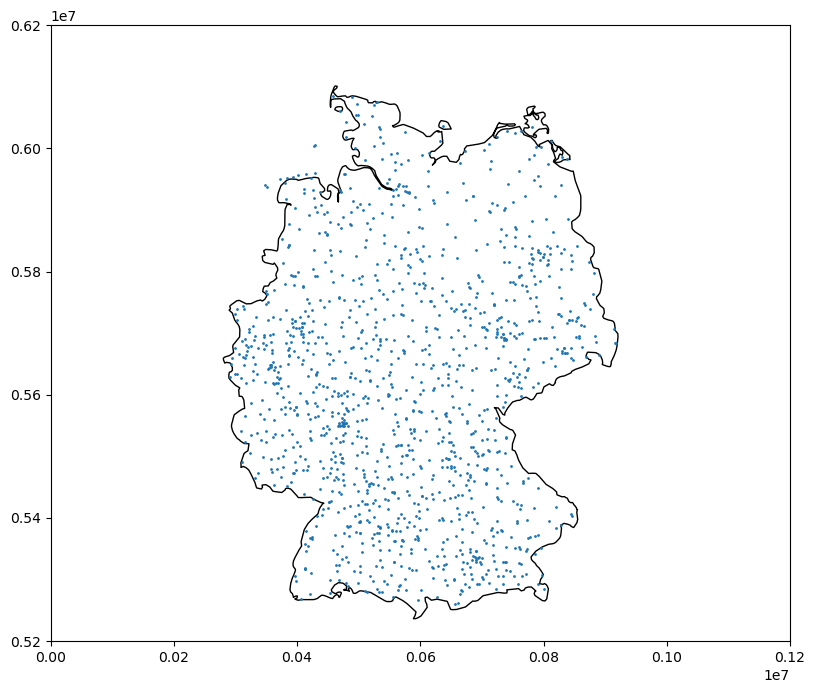

In [20]:
# Crear el gráfico base y guardarlo en 'base1' con un tamaño ajustado
fig, base1 = plt.subplots(figsize=(10, 8))
germany_25832.plot(ax=base1, color='white', edgecolor='black')

# Modificar las etiquetas del eje X para que se expresen en 1e7
base1.ticklabel_format(axis='x', style='sci', scilimits=(7,7))

# Ajustar el límite del eje X
base1.set_xlim([0, 0.12 * 10**7])  # Asegurar que el eje X llegue hasta 0.12e7

# Modificar las etiquetas del eje Y para que se expresen en 1e7
base1.ticklabel_format(axis='y', style='sci', scilimits=(7, 7))

# Ajustar el límite del eje Y
base1.set_ylim([5.2 * 10**6, 6.2 * 10**6])

# Ploteamos
airports_25832.plot(ax=base1,markersize=1)

In [23]:
# Recuerda:
type(airports_25832), type(infoairportsGermany)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [27]:
airports_25832.rename(columns={'type':'kind'},inplace=True)

In [28]:
!pip install folium matplotlib mapclassify

In [29]:
# Colocaremos dentro de un mapa guiable
from folium import LayerControl

#Germany = airports[airports.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports_25832[airports_25832.kind=='small_airport'].explore(color="yellow",name="small",show=False)
m = airports_25832[airports_25832.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports_25832[airports_25832.kind=='large_airport'].explore(m=m, color="brown",name="large",show=True)
m = airports_25832[airports_25832.kind=='closed'].explore(m=m, color="red",name="closed",show=False)
m = airports_25832[airports_25832.kind=='heliport'].explore(m=m, color="green",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m)
m

In [32]:
airports_25832.to_file(os.path.join("maps","germanyMaps_25832_airport.gpkg"),layer='airports', driver="GPKG")

In [33]:
# EJERCICIO 4
# 1. Check if your country is a polygon or multipolygon.
# 2. Recover just the boundaries of that country.
# 3. Turn the boundary into a GDF.

# Verificamos si es un poligono o multipoligono
germany_25832

,COUNTRY,geometry
87,Germany,"MULTIPOLYGON (((381111.532 5447498.749, 380707..."


In [34]:
germany_25832.boundary

87    MULTILINESTRING ((381111.532 5447498.749, 3807...
dtype: geometry

<Axes: >

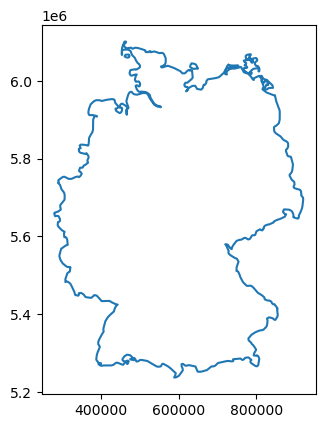

In [35]:
# Moldearemos las fronteras
germany_25832.boundary.plot()

In [36]:
# Convertir el limite en un GDF
type(germany_25832.boundary)

geopandas.geoseries.GeoSeries

In [37]:
germany_25832.boundary.to_frame()

,0
87,"MULTILINESTRING ((381111.532 5447498.749, 3807..."


In [38]:
# conversion
germany_25832_border=germany.boundary.to_frame()

# nueva columna
germany_25832_border['name']='Germany'

# renombramos
germany_25832_border.rename(columns={0:'geometry'},inplace=True)

# configuramos
germany_25832_border = germany_25832_border.set_geometry("geometry")

# verificar
germany_25832_border.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
germany_25832_border

,geometry,name
87,"MULTILINESTRING ((7.36901 49.16878, 7.36403 49...",Germany


<Axes: >

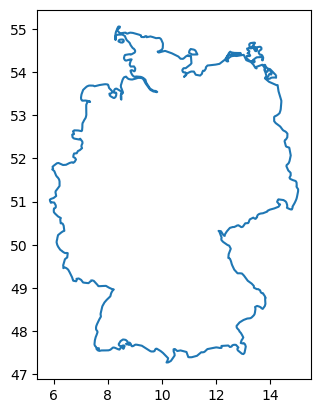

In [40]:
# Tenemos nuestra frontera
germany_25832_border.plot()

In [41]:
# EJERCICIO 5:
# 1. Look for sub administrative divisions of your country
# 2. Check all the CRSs of those divisions
# 3. If you find one CRS is missing, fill the CRS with the right projection.

# Leemos nuestros archivos
germany_states = gpd.read_file("https://github.com/TartariaData/GeoDF_Operations/raw/main/maps/gadm41_DEU_shp/gadm41_DEU_1.shp")
germany_municipalities = gpd.read_file("https://github.com/TartariaData/GeoDF_Operations/raw/main/maps/gadm41_DEU_shp/gadm41_DEU_2.shp")

germany_states.crs, germany_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [42]:
type(germany_states), type(germany_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

<Axes: >

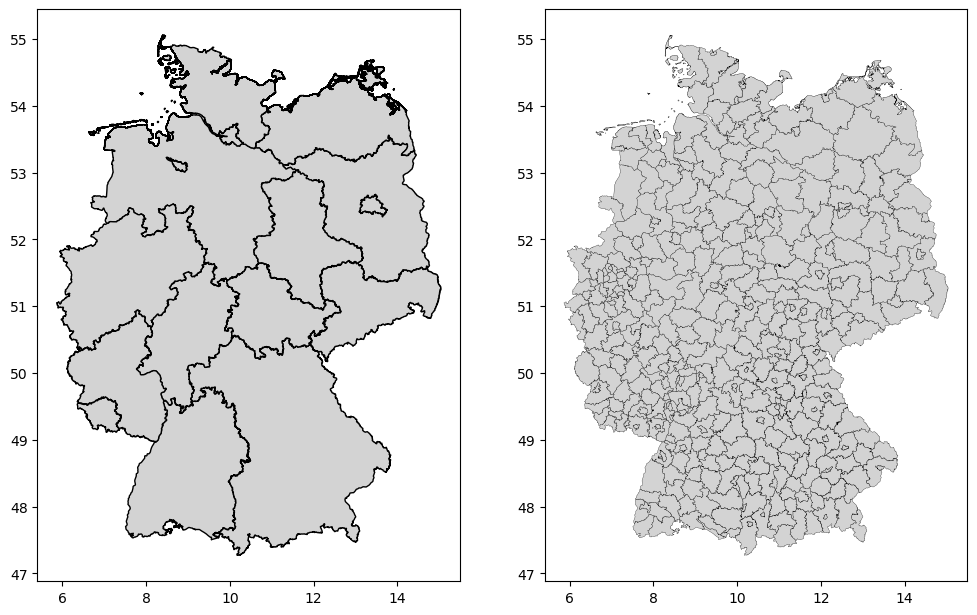

In [43]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

germany_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
germany_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [44]:
germany_states.to_crs(25832)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,DEU.1_1,DEU,Germany,Baden-Württemberg,NA,NA,Land,State,08,DE.BW,NA,"MULTIPOLYGON (((451113.651 5268782.630, 450945..."
1,DEU.2_1,DEU,Germany,Bayern,Bavaria,NA,Freistaat,Free State,09,DE.BY,DE-BY,"POLYGON ((681523.301 5263034.421, 681520.383 5..."
2,DEU.3_1,DEU,Germany,Berlin,NA,NA,Land,State,11,DE.BE,DE-BE,"POLYGON ((804617.008 5838823.273, 804525.443 5..."
3,DEU.4_1,DEU,Germany,Brandenburg,NA,NA,Land,State,12,DE.BR,DE-BB,"MULTIPOLYGON (((800367.200 5707259.660, 800507..."
4,DEU.5_1,DEU,Germany,Bremen,NA,NA,Freie Hansestadt,State,04,DE.HB,DE-HB,"MULTIPOLYGON (((478279.797 5892126.842, 478299..."
5,DEU.6_1,DEU,Germany,Hamburg,NA,NA,Freie und Hansestadt,State,02,DE.HH,DE-HH,"MULTIPOLYGON (((577600.604 5952022.104, 577592..."
6,DEU.7_1,DEU,Germany,Hessen,Hesse,NA,Land,State,06,DE.HE,DE-HE,"MULTIPOLYGON (((491741.381 5473817.891, 491692..."
7,DEU.8_1,DEU,Germany,Mecklenburg-Vorpommern,Mecklenburg-West Pomerania,NA,Land,State,13,DE.MV,DE-MV,"MULTIPOLYGON (((671745.378 5894020.782, 671752..."
8,DEU.9_1,DEU,Germany,Niedersachsen,Lower Saxony,NA,Land,State,03,DE.NI,DE-NI,"MULTIPOLYGON (((594820.493 5712449.818, 594872..."
9,DEU.10_1,DEU,Germany,Nordrhein-Westfalen,North Rhine-Westphalia,NA,Land,State,05,DE.NW,DE-NW,"POLYGON ((327904.444 5583358.977, 327590.502 5..."


In [45]:
# Estados
germany_states.geometry.head()

0    MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...
1    POLYGON ((11.41009 47.49540, 11.41005 47.49536...
2    POLYGON ((13.50022 52.61379, 13.49855 52.61068...
3    MULTIPOLYGON (((13.32220 51.43674, 13.32402 51...
4    MULTIPOLYGON (((8.67501 53.17805, 8.67532 53.1...
Name: geometry, dtype: geometry

In [46]:
germany_municipalities.to_crs(25832)

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,DEU.1.1_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Alb-Donau-Kreis,NA,NA,Landkreis,District,08425,DE.BW.AD,"POLYGON ((550052.857 5335565.585, 550119.568 5..."
1,DEU.1.2_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Baden-Baden,NA,NA,Stadtkreis,District,08211,DE.BW.BB,"MULTIPOLYGON (((435154.552 5398714.217, 434838..."
2,DEU.1.3_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Biberach,NA,NA,Landkreis,District,08426,DE.BW.BR,"POLYGON ((556077.638 5313726.733, 556052.272 5..."
3,DEU.1.4_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Böblingen,NA,NA,Landkreis,District,08115,DE.BW.BL,"POLYGON ((489014.990 5375545.628, 489008.507 5..."
4,DEU.1.5_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Bodensee,NA,NA,Water body,Water body,NA,NA,"POLYGON ((503362.553 5295901.358, 503397.607 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,DEU.16.19_1,DEU,Germany,DEU.16_1,Thüringen,NA,Suhl,NA,NA,Kreisfreie Stadt,District,16054,DE.TH.SU,"POLYGON ((618381.156 5602546.164, 618122.442 5..."
399,DEU.16.20_1,DEU,Germany,DEU.16_1,Thüringen,NA,Unstrut-Hainich-Kreis,NA,NA,Landkreis,District,16064,DE.TH.UH,"POLYGON ((621761.580 5663679.230, 621753.892 5..."
400,DEU.16.21_1,DEU,Germany,DEU.16_1,Thüringen,NA,Wartburgkreis,NA,NA,Landkreis,District,16063,DE.TH.WR,"POLYGON ((574648.599 5613447.022, 574563.526 5..."
401,DEU.16.23_1,DEU,Germany,DEU.16_1,Thüringen,NA,Weimar,NA,NA,Kreisfreie Stadt,District,16055,DE.TH.WI,"POLYGON ((661161.472 5643193.309, 661089.157 5..."


In [47]:
# Municipalidades
germany_municipalities.geometry.head()

0    POLYGON ((9.67322 48.17136, 9.67410 48.16991, ...
1    MULTIPOLYGON (((8.11805 48.73807, 8.11372 48.7...
2    POLYGON ((9.75139 47.97439, 9.75106 47.97507, ...
3    POLYGON ((8.85120 48.53292, 8.85111 48.53247, ...
4    POLYGON ((9.04492 47.81646, 9.04539 47.81644, ...
Name: geometry, dtype: geometry

In [48]:
germany_states.crs = "EPSG:4326"
germany_municipalities.crs = "EPSG:4326"
germany_states=germany_states.to_crs(25832)
germany_municipalities=germany_municipalities.to_crs(25832)

<Axes: >

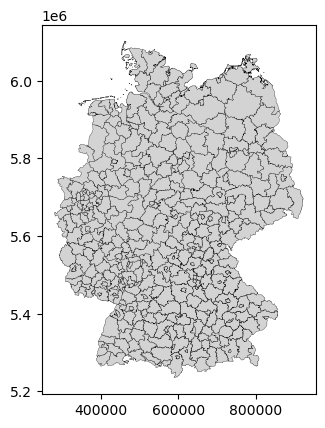

In [65]:
# EJERCICIO N°6
# 1. Create some subset of polygons with your country data.
# 2. Use Unary UNION with those polygons.
# 3. Create a geoDF with the result.
# 4. Use dissolve with the same polygons, and create a geoDF.

germany_municipalities.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [66]:
# Vemos lo siguiente
germany_municipalities.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,DEU.1.1_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Alb-Donau-Kreis,NA,NA,Landkreis,District,08425,DE.BW.AD,"POLYGON ((550052.857 5335565.585, 550119.568 5..."
1,DEU.1.2_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Baden-Baden,NA,NA,Stadtkreis,District,08211,DE.BW.BB,"MULTIPOLYGON (((435154.552 5398714.217, 434838..."
2,DEU.1.3_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Biberach,NA,NA,Landkreis,District,08426,DE.BW.BR,"POLYGON ((556077.638 5313726.733, 556052.272 5..."
3,DEU.1.4_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Böblingen,NA,NA,Landkreis,District,08115,DE.BW.BL,"POLYGON ((489014.990 5375545.628, 489008.507 5..."
4,DEU.1.5_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Bodensee,NA,NA,Water body,Water body,NA,NA,"POLYGON ((503362.553 5295901.358, 503397.607 5..."


In [67]:
# Listado de municipalidades
germany_municipalities.NAME_1.value_counts()

NAME_1
Bayern                    96
Nordrhein-Westfalen       53
Niedersachsen             46
Baden-Württemberg         45
Rheinland-Pfalz           36
Hessen                    26
Thüringen                 23
Brandenburg               18
Schleswig-Holstein        15
Sachsen-Anhalt            14
Sachsen                   13
Mecklenburg-Vorpommern     8
Saarland                   6
Bremen                     2
Berlin                     1
Hamburg                    1
Name: count, dtype: int64

<Axes: >

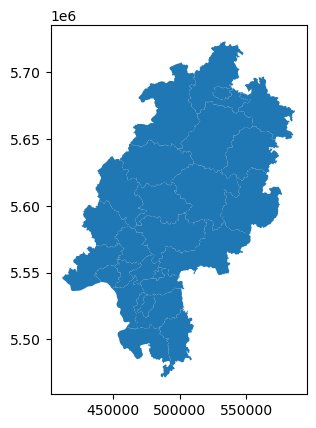

In [68]:
# Utilizamos a Hessen
germany_municipalities[germany_municipalities.NAME_1=='Hessen'].plot()

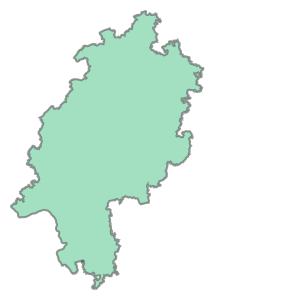

In [69]:
germany_municipalities[germany_municipalities.NAME_1=='Hessen'].unary_union

In [70]:
Hessen_union=germany_municipalities[germany_municipalities.NAME_1=='Hessen'].unary_union
type(Hessen_union)

shapely.geometry.multipolygon.MultiPolygon

In [71]:
gpd.GeoDataFrame(index=[0],data={'NAME':'Hessen'},
                 crs=germany_municipalities.crs,
                 geometry=[Hessen_union])

,NAME,geometry
0,Hessen,"MULTIPOLYGON (((492195.619 5474253.192, 492103..."


<Axes: >

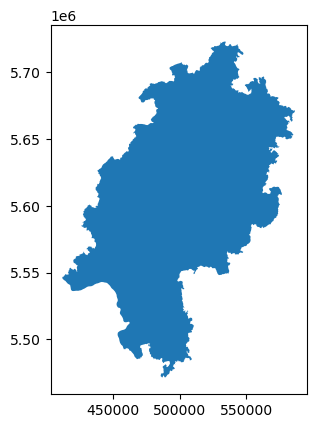

In [72]:
germany_municipalities[germany_municipalities.NAME_1=='Hessen'].dissolve().plot()

In [73]:
Hessen_dissolve=germany_municipalities[germany_municipalities.NAME_1=='Hessen'].dissolve()
type(Hessen_dissolve)

geopandas.geodataframe.GeoDataFrame

In [74]:
Hessen_dissolve

,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,"MULTIPOLYGON (((492195.619 5474253.192, 492103...",DEU.7.1_1,DEU,Germany,DEU.7_1,Hessen,NA,Bergstraße,NA,NA,Landkreis,District,06431,DE.HE.BR


In [75]:
Hessen_dissolve.columns

Index(['geometry', 'GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1',
       'NAME_2', 'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2',
       'HASC_2'],
      dtype='object')

In [76]:
Hessen_dissolve.drop(columns=['NAME_2','NL_NAME_1','VARNAME_2', 'NL_NAME_2','TYPE_2', 'ENGTYPE_2','CC_2','HASC_2'],inplace=True)
Hessen_dissolve

,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1
0,"MULTIPOLYGON (((492195.619 5474253.192, 492103...",DEU.7.1_1,DEU,Germany,DEU.7_1,Hessen


<Axes: >

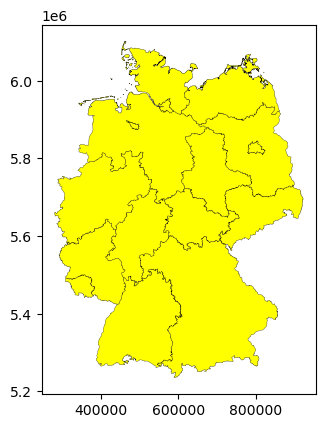

In [77]:
# Observamos solo las municipalidades
germany_municipalities.dissolve(by='NAME_1').plot(facecolor='yellow', edgecolor='black',linewidth=0.2)

In [78]:
Germany_name_diss=germany_municipalities.dissolve(by='NAME_1')
Germany_name_diss.head()

,geometry,GID_2,GID_0,COUNTRY,GID_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
NAME_1,,,,,,,,,,,,,
Baden-Württemberg,"MULTIPOLYGON (((545271.779 5270278.538, 545359...",DEU.1.1_1,DEU,Germany,DEU.1_1,NA,Alb-Donau-Kreis,NA,NA,Landkreis,District,08425,DE.BW.AD
Bayern,"POLYGON ((681533.522 5263047.254, 681527.053 5...",DEU.2.1_1,DEU,Germany,DEU.2_1,NA,Aichach-Friedberg,NA,NA,Landkreis,District,09771,DE.BY.AF
Berlin,"POLYGON ((804617.008 5838823.273, 804525.443 5...",DEU.3.1_1,DEU,Germany,DEU.3_1,NA,Berlin,NA,NA,Kreisfreie Stadt,District,11000,DE.BE.BR
Brandenburg,"MULTIPOLYGON (((826449.090 5701869.020, 826229...",DEU.4.1_1,DEU,Germany,DEU.4_1,NA,Barnim,NA,NA,Landkreis,District,12060,DE.BB.BR
Bremen,"MULTIPOLYGON (((478269.810 5892175.187, 478279...",DEU.5.1_1,DEU,Germany,DEU.5_1,NA,Bremen,NA,NA,Kreisfreie Stadt,District,04011,DE.HB.BR


In [79]:
Germany_name_diss.drop(columns=['NAME_2','NL_NAME_1','VARNAME_2', 'NL_NAME_2','TYPE_2', 'ENGTYPE_2','CC_2','HASC_2'],inplace=True)
Germany_name_diss.reset_index(inplace=True)

# Con esto colocamos un orden a nuestros valores
column_order = ['NAME_1','geometry', 'COUNTRY', 'GID_0', 'GID_1', 'GID_2']
Germany_name_diss = Germany_name_diss[column_order]
Germany_name_diss.info()
Germany_name_diss.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME_1    16 non-null     object  
 1   geometry  16 non-null     geometry
 2   COUNTRY   16 non-null     object  
 3   GID_0     16 non-null     object  
 4   GID_1     16 non-null     object  
 5   GID_2     16 non-null     object  
dtypes: geometry(1), object(5)
memory usage: 900.0+ bytes


,NAME_1,geometry,COUNTRY,GID_0,GID_1,GID_2
0,Baden-Württemberg,"MULTIPOLYGON (((545271.779 5270278.538, 545359...",Germany,DEU,DEU.1_1,DEU.1.1_1
1,Bayern,"POLYGON ((681533.522 5263047.254, 681527.053 5...",Germany,DEU,DEU.2_1,DEU.2.1_1
2,Berlin,"POLYGON ((804617.008 5838823.273, 804525.443 5...",Germany,DEU,DEU.3_1,DEU.3.1_1
3,Brandenburg,"MULTIPOLYGON (((826449.090 5701869.020, 826229...",Germany,DEU,DEU.4_1,DEU.4.1_1
4,Bremen,"MULTIPOLYGON (((478269.810 5892175.187, 478279...",Germany,DEU,DEU.5_1,DEU.5.1_1


In [81]:
# EJERCICIO N°7
# 1. Select some points from your maps.
# 2. Create the convex hull for those points.
# 3. Turn the hull into a GDF.
# 4. Plot the hull on top of the country


In [82]:
# Ubicamos el centro
centroGermany=germany_25832.centroid
centroGermany

87    POINT (596343.988 5656461.701)
dtype: geometry

In [83]:
# Sus coordenadas
germany_25832.centroid.x.values[0],germany_25832.centroid.y.values[0]

(596343.988412428, 5656461.700987704)

In [84]:
airports_25832.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Munich Airport,large_airport,48.353802,11.78610,1487.0,Bavaria,Munich,POINT (706396.099 5359376.354)
1,Berlin-Tegel Otto Lilienthal Airport,closed,52.559700,13.28770,122.0,Berlin,Berlin,POINT (790597.072 5831932.941)
2,Düsseldorf Airport,large_airport,51.289501,6.76678,147.0,North Rhine-Westphalia,Düsseldorf,POINT (344281.592 5684387.872)
3,Hamburg Helmut Schmidt Airport,large_airport,53.630402,9.98823,53.0,Hamburg,Hamburg,POINT (565349.504 5942855.095)
4,Cologne Bonn Airport,large_airport,50.865898,7.14274,302.0,North Rhine-Westphalia,Köln (Cologne),POINT (369306.134 5636555.728)


<Axes: >

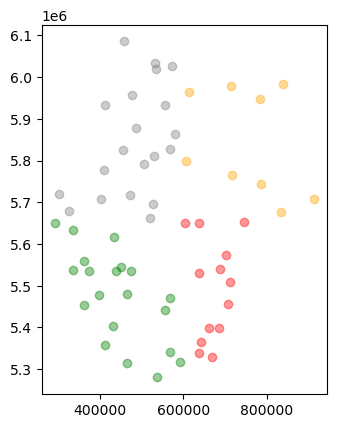

In [85]:
# En torno al centro dividiremos en 4 cuadrantes
centroidX,centroidY=germany_25832.centroid.x.values[0],germany_25832.centroid.y.values[0]

Germany_AirTopLeft=airports_25832[airports_25832.kind=='medium_airport'].cx[:centroidX,centroidY:]
Germany_AirTopRight=airports_25832[airports_25832.kind=='medium_airport'].cx[centroidX:,centroidY:]
Germany_AirBottomLeft=airports_25832[airports_25832.kind=='medium_airport'].cx[:centroidX,:centroidY]
Germany_AirBottomRight=airports_25832[airports_25832.kind=='medium_airport'].cx[centroidX:,:centroidY]

# Ploteamos
baseG=Germany_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Germany_AirTopRight.plot(ax=baseG,facecolor='orange', alpha=0.4)
Germany_AirBottomLeft.plot(ax=baseG,facecolor='green', alpha=0.4)
Germany_AirBottomRight.plot(ax=baseG,facecolor='red', alpha=0.4)

In [86]:
Germany_AirBottomLeft.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
7,Frankfurt-Hahn Airport,medium_airport,49.948700,7.26389,1649.0,Rhineland-Palatinate,Frankfurt am Main (Lautzenhausen),POINT (375448.986 5534371.602)
13,Friedrichshafen Airport,medium_airport,47.671299,9.51149,1367.0,Baden-Württemberg,Friedrichshafen,POINT (538396.545 5279894.231)
18,Memmingen Allgau Airport,medium_airport,47.988800,10.23950,2077.0,Bavaria,Memmingen,POINT (592480.399 5315798.712)
21,Karlsruhe Baden-Baden Airport,medium_airport,48.779400,8.08050,408.0,Baden-Württemberg,Rheinmünster,POINT (432449.311 5403340.922)
23,Saarbrücken Airport,medium_airport,49.214600,7.10951,1058.0,Saarland,Saarbrücken,POINT (362323.456 5453032.307)


<Axes: >

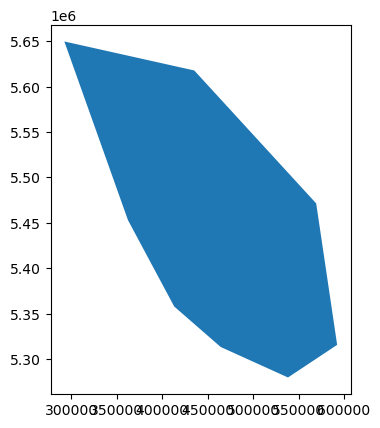

In [87]:
Germany_AirBottomLeft.dissolve().convex_hull.plot()

In [88]:
Germany_AirBottomLeft.dissolve().convex_hull

0    POLYGON ((538396.545 5279894.231, 464341.587 5...
dtype: geometry

<Axes: >

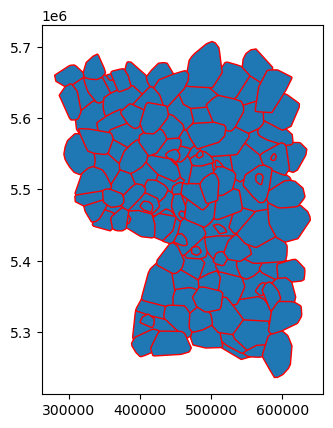

In [89]:
germany_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

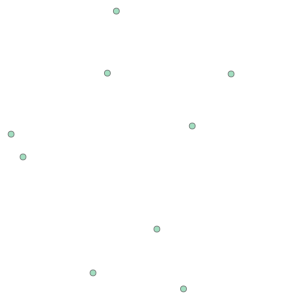

In [90]:
large_airport=airports_25832[airports_25832.kind=='large_airport']
large_airport.unary_union

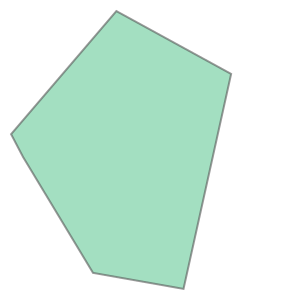

In [91]:
large_airport.unary_union.convex_hull

In [92]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=large_airport.crs,
                                    geometry=[large_airport.unary_union.convex_hull])
LargeAirport_hull['name']='large airports hull'
LargeAirport_hull

,geometry,name
0,"POLYGON ((706396.099 5359376.354, 516335.256 5...",large airports hull


<Axes: >

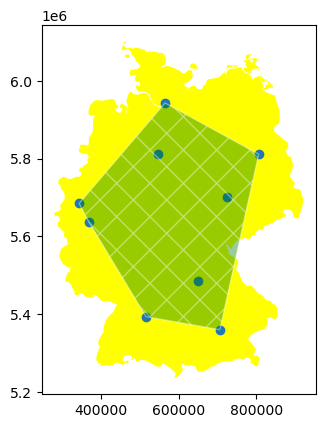

In [93]:
base=germany_25832.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [94]:
# EJERCICIO N°8
# 1. Apply two of these operations to your maps.
# 2. Apply two of these operations to the next maps:

# Definimo nuestros cuadrantes
# Norte
MunisN_germany=germany_municipalities.cx[:,centroidY:]
# Sur
MunisS_germany=germany_municipalities.cx[:,:centroidY]
# Oeste
MunisW_germany=germany_municipalities.cx[:centroidX,:]
# Este
MunisE_germany=germany_municipalities.cx[centroidX:,:]

<Axes: >

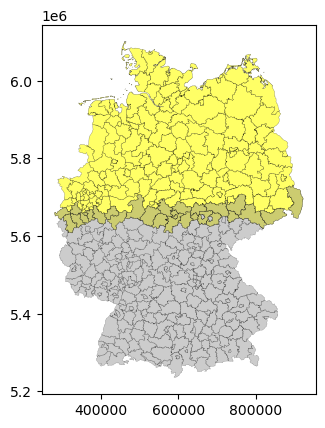

In [95]:
base=MunisN_germany.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisS_germany.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

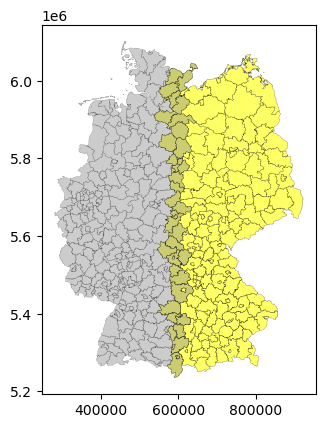

In [96]:
base=MunisE_germany.plot(facecolor='yellow', edgecolor='black',linewidth=0.2, alpha=0.6)
MunisW_germany.plot(facecolor='grey', edgecolor='black',linewidth=0.2,ax=base, alpha=0.4)

<Axes: >

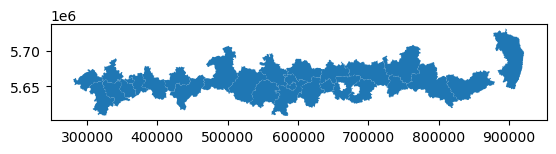

In [97]:
# Interseccion
munisNS_germany=MunisN_germany.overlay(MunisS_germany, how="intersection",keep_geom_type=True)
munisNS_germany.plot()

<Axes: >

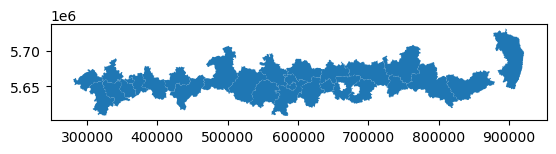

In [98]:
MunisN_germany.sjoin(MunisS_germany, how="inner", predicate='contains').plot()

C:\Users\frede\anaconda3\envs\VanderickWorld\Lib\site-packages\geopandas\geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


<Axes: >

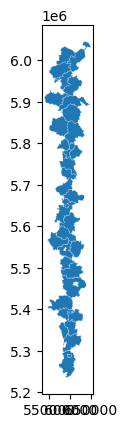

In [99]:
# aun con la superposicion
munisWE_germany=MunisW_germany.overlay(MunisE_germany, how="intersection",keep_geom_type=True)
munisWE_germany.plot(edgecolor='white',linewidth=0.1)

In [100]:
# Vemos la informacion
print('munisNS')
munisNS_germany.info()
print()
print('munisWE')
munisWE_germany.info()

munisNS
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GID_2_1      28 non-null     object  
 1   GID_0_1      28 non-null     object  
 2   COUNTRY_1    28 non-null     object  
 3   GID_1_1      28 non-null     object  
 4   NAME_1_1     28 non-null     object  
 5   NL_NAME_1_1  28 non-null     object  
 6   NAME_2_1     28 non-null     object  
 7   VARNAME_2_1  28 non-null     object  
 8   NL_NAME_2_1  28 non-null     object  
 9   TYPE_2_1     28 non-null     object  
 10  ENGTYPE_2_1  28 non-null     object  
 11  CC_2_1       28 non-null     object  
 12  HASC_2_1     28 non-null     object  
 13  GID_2_2      28 non-null     object  
 14  GID_0_2      28 non-null     object  
 15  COUNTRY_2    28 non-null     object  
 16  GID_1_2      28 non-null     object  
 17  NAME_1_2     28 non-null     object  
 18  NL_NAME_1_2  28 

In [103]:
# Evaluamos que valores tomar
munisWE_germany.head()

,GID_2_1,GID_0_1,COUNTRY_1,GID_1_1,NAME_1_1,NL_NAME_1_1,NAME_2_1,VARNAME_2_1,NL_NAME_2_1,TYPE_2_1,...,NAME_1_2,NL_NAME_1_2,NAME_2_2,VARNAME_2_2,NL_NAME_2_2,TYPE_2_2,ENGTYPE_2_2,CC_2_2,HASC_2_2,geometry
0,DEU.1.16_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Heidenheim,NA,NA,Landkreis,...,Baden-Württemberg,NA,Heidenheim,NA,NA,Landkreis,District,08135,DE.BW.HH,"MULTIPOLYGON (((596631.438 5381209.178, 596526..."
1,DEU.1.29_1,DEU,Germany,DEU.1_1,Baden-Württemberg,NA,Ostalbkreis,NA,NA,Landkreis,...,Baden-Württemberg,NA,Ostalbkreis,NA,NA,Landkreis,District,08136,DE.BW.OA,"MULTIPOLYGON (((558126.272 5398450.605, 558110..."
2,DEU.2.6_1,DEU,Germany,DEU.2_1,Bayern,NA,Ansbach,NA,NA,Landkreis,...,Bayern,NA,Ansbach,NA,NA,Landkreis,District,09571,DE.BY.AN,"POLYGON ((621480.974 5438097.396, 621712.166 5..."
3,DEU.2.11_1,DEU,Germany,DEU.2_1,Bayern,NA,Bad Kissingen,NA,NA,Landkreis,...,Bayern,NA,Bad Kissingen,NA,NA,Landkreis,District,09672,DE.BY.BK,"POLYGON ((568580.175 5546870.002, 568532.495 5..."
4,DEU.2.23_1,DEU,Germany,DEU.2_1,Bayern,NA,Dillingen an der Donau,NA,NA,Landkreis,...,Bayern,NA,Dillingen an der Donau,NA,NA,Landkreis,District,09773,DE.BY.DD,"POLYGON ((617322.155 5372142.114, 617448.249 5..."


In [105]:
# Nos quedamos con las columnas necesarias
keep=['COUNTRY_1','NAME_1_1','NAME_2_1','geometry']
munisNS_germany=munisNS_germany.loc[:,keep]
munisWE_germany=munisWE_germany.loc[:,keep]

In [106]:
munisNS_germany.overlay(munisWE_germany,how="union",keep_geom_type=True).head()

,COUNTRY_1_1,NAME_1_1_1,NAME_2_1_1,COUNTRY_1_2,NAME_1_1_2,NAME_2_1_2,geometry
0,Germany,Thüringen,Eisenach,Germany,Thüringen,Eisenach,"POLYGON ((582966.385 5650321.775, 582991.487 5..."
1,Germany,Thüringen,Unstrut-Hainich-Kreis,Germany,Thüringen,Unstrut-Hainich-Kreis,"POLYGON ((621761.580 5663679.230, 621753.892 5..."
2,Germany,Thüringen,Wartburgkreis,Germany,Thüringen,Wartburgkreis,"POLYGON ((574648.599 5613447.022, 574563.526 5..."
3,Germany,Hessen,Hersfeld-Rotenburg,NaN,NaN,NaN,"POLYGON ((550923.776 5621847.892, 550674.036 5..."
4,Germany,Hessen,Schwalm-Eder-Kreis,NaN,NaN,NaN,"POLYGON ((532773.506 5628073.537, 532541.836 5..."


In [107]:
# appending
pd.concat([munisNS_germany,munisWE_germany],ignore_index=True).head()

,COUNTRY_1,NAME_1_1,NAME_2_1,geometry
0,Germany,Hessen,Hersfeld-Rotenburg,"POLYGON ((550923.776 5621847.892, 550674.036 5..."
1,Germany,Hessen,Schwalm-Eder-Kreis,"POLYGON ((532773.506 5628073.537, 532541.836 5..."
2,Germany,Hessen,Waldeck-Frankenberg,"POLYGON ((471389.266 5644283.120, 471123.842 5..."
3,Germany,Hessen,Werra-Meißner-Kreis,"POLYGON ((581793.502 5656090.104, 582085.621 5..."
4,Germany,Nordrhein-Westfalen,Düren,"POLYGON ((328242.687 5613768.051, 328246.755 5..."


<Axes: >

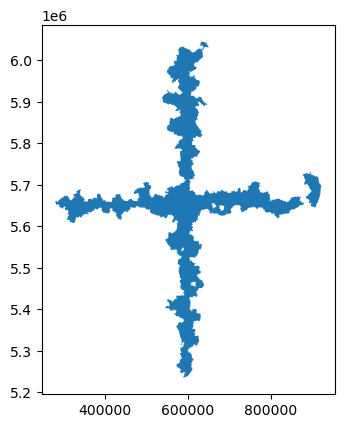

In [108]:
munisNS_germany.dissolve().overlay(munisWE_germany.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [109]:
muniMidgermany=munisNS_germany.dissolve().overlay(munisWE_germany.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidgermany

# Limpieza
muniMidgermany['zone']='middles'
muniMidgermany=muniMidgermany.loc[:,['COUNTRY_1_1','zone','geometry']]
muniMidgermany

,COUNTRY_1_1,zone,geometry
0,Germany,middles,"MULTIPOLYGON (((556882.030 5397249.512, 556326..."


<Axes: >

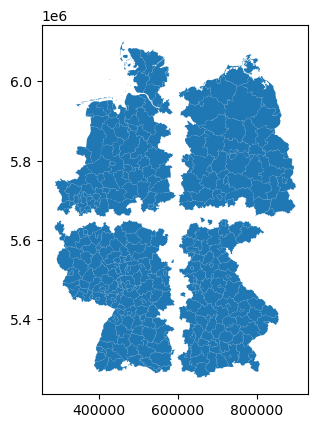

In [110]:
# Municipalidades
germany_municipalities.overlay(muniMidgermany, how='difference').plot()

<Axes: >

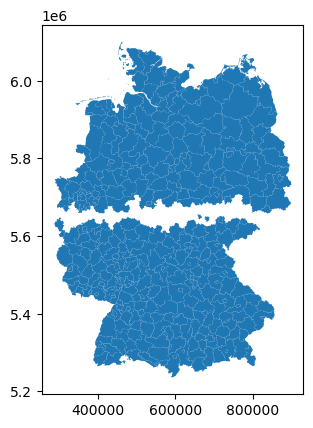

In [111]:
MunisN_germany.overlay(MunisS_germany, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

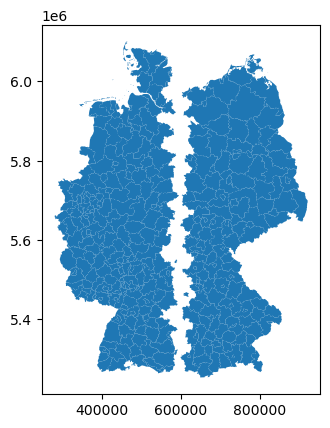

In [112]:
MunisW_germany.overlay(MunisE_germany, how="symmetric_difference",keep_geom_type=False).plot()

In [113]:
# hulls for the mid size airports:
Germany_AirTopLeft_hull=Germany_AirTopLeft.dissolve().convex_hull
Germany_AirTopRight_hull=Germany_AirTopRight.dissolve().convex_hull
Germany_AirBottomLeft_hull=Germany_AirBottomLeft.dissolve().convex_hull
Germany_AirBottomRight_hull=Germany_AirBottomRight.dissolve().convex_hull

<Axes: >

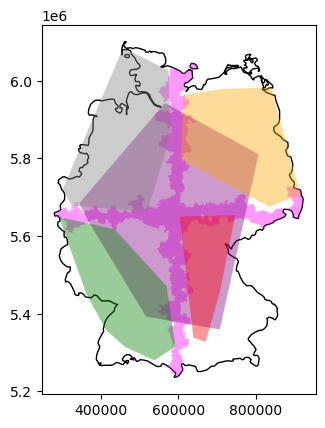

In [114]:
base = germany_25832.plot(color='white', edgecolor='black') #unprojected
muniMidgermany.plot(ax=base,facecolor='magenta',alpha=0.4) #unprojected
LargeAirport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
Germany_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Germany_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
Germany_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
Germany_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)

In [115]:
# no valido
germany_municipalities[~germany_municipalities.is_valid]

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry


C:\Users\frede\AppData\Local\Temp\ipykernel_39768\4241639417.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  germany_municipalities[~germany_municipalities.is_valid].plot()


<Axes: >

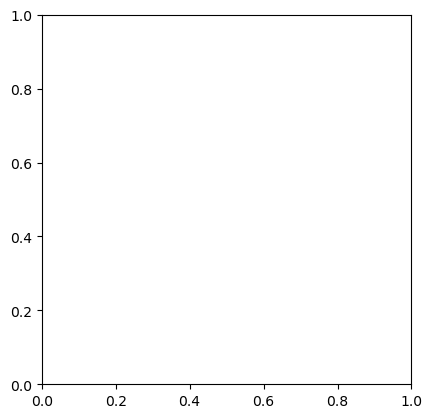

In [116]:
# see the invalid:
germany_municipalities[~germany_municipalities.is_valid].plot()

In [ ]:
# Es valido lo cual indica un desarrollo correcto